## Model Building

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

# Load your dataset
car_data = pd.read_csv("cleaned_data.csv")

# Drop 'url' and 'year'
#car_data = car_data.drop(columns=['url', 'year'])
car_data = car_data.dropna()

# Define features and target
X = car_data.drop(columns=['price'])  # all columns except price
y = car_data['price']  # target variable

numerical_cols = [
    'horsePower',
    'mileage', 'mpgCity', 'mpgHighway', 'evRange',
    'evMpgeCity', 'evMpgeHighway',
    'seats', 'numOfOwners', 'age'
]

categorical_cols = [
    'bodyType', 'fuelType', 'driveTrain', 
    'transmission', 'hasReportedAccident'
]

# Separate encoders
target_encoder = TargetEncoder(cols=['make', 'model'])
numeric_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# ColumnTransformer for everything else (exclude 'make' and 'model')
rest_preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', onehot_encoder, categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [5]:
# Pipeline with scaling + linear regression
model = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")


Mean Squared Error: 25263557.17
Mean Absolute Error: 3490.20


## SVR

In [6]:
from sklearn.svm import SVR

# SVR model inside a pipeline
svr_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', SVR(kernel='rbf', C=100, epsilon=0.1))  # You can tune C, epsilon, kernel
])

# Fit model
svr_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr_pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
mae_svr = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}")

Mean Squared Error: 44989416.53
Mean Absolute Error: 3921.46


## K nearest regressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regressor pipeline
knn_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=9))  # You can tune this
])

# Train the model
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_pipeline.predict(X_test)
mse_knr = mean_squared_error(y_test, y_pred)
mae_knr = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_knr:.2f}")
print(f"Mean Absolute Error: {mae_knr:.2f}")

Mean Squared Error: 17595407.91
Mean Absolute Error: 2693.07


## PLS Regression

In [8]:
from sklearn.cross_decomposition import PLSRegression

# PLS Regression pipeline
pls_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', PLSRegression(n_components=5))  # You can tune n_components
])

# Train the model
pls_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pls_pipeline.predict(X_test)
mse_pls = mean_squared_error(y_test, y_pred)
mae_pls = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_pls:.2f}")
print(f"Mean Absolute Error: {mae_pls:.2f}")

Mean Squared Error: 26130237.95
Mean Absolute Error: 3523.17


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree pipeline
tree_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train model
tree_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_pipeline.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"Mean Absolute Error: {mae_dt:.2f}")

Mean Squared Error: 17188629.96
Mean Absolute Error: 2560.44


## Gradient boosting Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_pipeline.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred)
mae_gbr = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_gbr:.2f}")
print(f"Mean Absolute Error: {mae_gbr:.2f}")

Mean Squared Error: 14578248.38
Mean Absolute Error: 2521.11


## MLP Regressor

In [11]:
from sklearn.neural_network import MLPRegressor

# MLP Regressor pipeline
mlp_pipeline = Pipeline(steps=[
    ('target_enc', target_encoder),         # TargetEncoder gets access to y
    ('rest', rest_preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

# Train model
mlp_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp_pipeline.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred)
mae_mlp = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_mlp:.2f}")
print(f"Mean Absolute Error: {mae_mlp:.2f}")

Mean Squared Error: 33327955.93
Mean Absolute Error: 3801.96


/opt/miniconda3/envs/carvana/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Results

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Linear Regression', 'Gradient Boosting', 'KNN Regressor',
              'MLP Regressor', 'PLS Regression', 'SVR'],
    'MSE': [mse_dt, mse_lr, mse_gbr, mse_knr, mse_mlp, mse_pls, mse_svr],
    'MAE': [mae_dt, mae_lr, mae_gbr, mae_knr, mae_mlp, mae_pls, mae_svr]
})

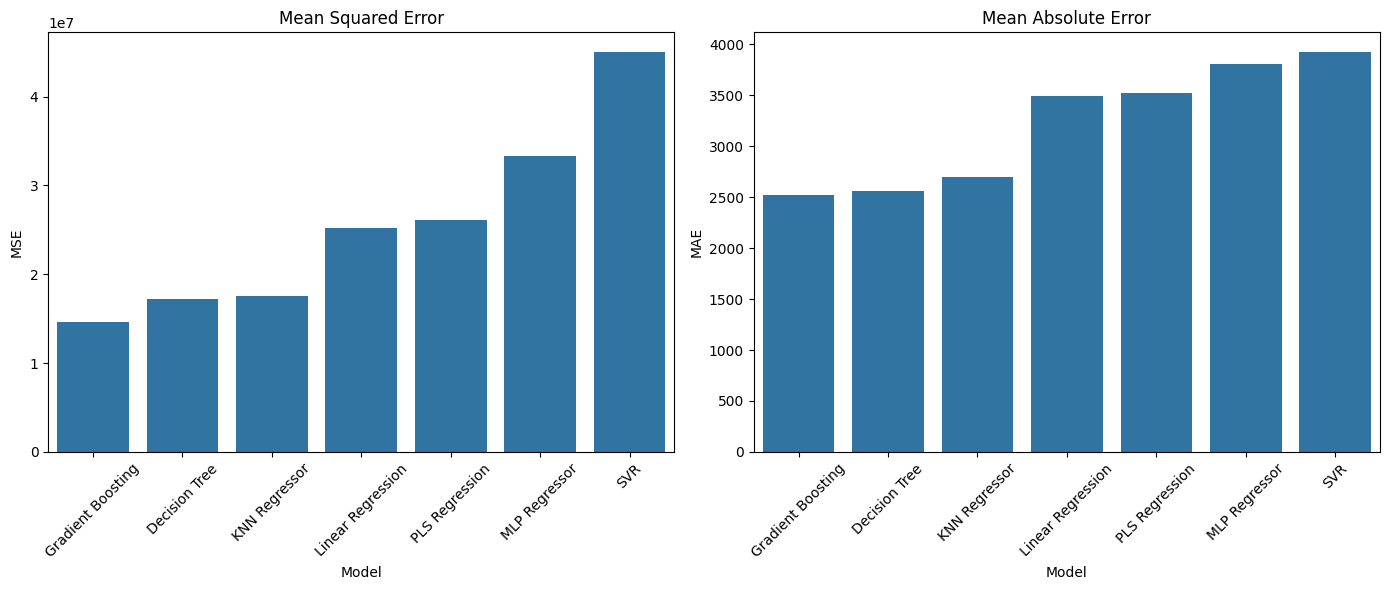

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE plot
sns.barplot(data=results_df, x='Model', y='MSE', ax=axes[0], order=list(results_df.sort_values(by='MSE', ascending=True).loc[:,'Model']))
axes[0].set_title("Mean Squared Error")
axes[0].tick_params(axis='x', rotation=45)

# MAE plot
sns.barplot(data=results_df, x='Model', y='MAE', ax=axes[1], order=list(results_df.sort_values(by='MAE', ascending=True).loc[:,'Model']))
axes[1].set_title("Mean Absolute Error")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Creating Gradient Boosting model

In [15]:
gb_pipeline

Pipeline(steps=[('target_enc', TargetEncoder(cols=['make', 'model'])),
                ('rest',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['horsePower', 'mileage',
                                                   'mpgCity', 'mpgHighway',
                                                   'evRange', 'evMpgeCity',
                                                   'evMpgeHighway', 'seats',
                                                   'numOfOwners', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['bodyType', 'fuelType',
                                                   'driveTrain', 'transmission',
                                                   'hasReportedAccident'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [16]:
import joblib

# Assuming your pipeline is already trained
joblib.dump(gb_pipeline, 'gb_pipeline.pkl')

['gb_pipeline.pkl']